# Contents of the Notebook <a class="anchor" id="toc"></a>

* [ACTS table](#f1)
    * [Data Transformation](#f1.1)
    * [Overview of donations over the years](#f1.2)
    * [Difference between donations (DO) and automatic deductions (PA)](#f1.3)
    
* [CONTACTS table](#f2)
    * [Data Transformation](#f2.1)
    * [Recent donors](#f2.2)
    * [Evolution of PA and DO donors](#f2.3)
    * [Donors by Region](#f2.4)

* [ACTIONS table](#f3)

In [386]:
library(RMySQL)
library(ggplot2)
library(dplyr)
library(stringr)
library(tidyverse)

options(repr.plot.width=8, repr.plot.height=3)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.2     ✔ readr   1.1.1
✔ tidyr   0.8.1     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [236]:
mydb = dbConnect(MySQL(), user='rym', password='', dbname='ma_charity_small', host='127.0.0.1', port=3306)
tables = dbListTables(mydb)
tables

[1] "actions"         "acts"            "assignment2"     "channels"       
[5] "contacts"        "payment_methods" "prefixes"

In [237]:
actions = fetch(dbSendQuery(mydb, "select * from actions"), n=-1)
acts = fetch(dbSendQuery(mydb, "select * from acts"), n=-1)
contacts = fetch(dbSendQuery(mydb, "select * from contacts"), n=-1)

Warning message in .local(conn, statement, ...):
“Unsigned INTEGER in col 0 imported as numeric”Warning message in .local(conn, statement, ...):
“Unsigned INTEGER in col 1 imported as numeric”Warning message in .local(conn, statement, ...):
“Decimal MySQL column 2 imported as numeric”Warning message in .local(conn, statement, ...):
“Unsigned INTEGER in col 0 imported as numeric”Warning message in .local(conn, statement, ...):
“Unsigned INTEGER in col 6 imported as numeric”

# ACTS table : donations and automatic deductions <a class="anchor" id="f1"></a>

## Data transformation <a class="anchor" id="f1.1"></a>

In [238]:
str(acts)

'data.frame':	310709 obs. of  9 variables:
 $ id               : num  1 22 44 106 107 117 132 141 251 278 ...
 $ contact_id       : num  0 70 90 110 110 120 130 140 150 160 ...
 $ amount           : num  40 2 3 3 7 3 6 2 3 6 ...
 $ act_date         : chr  "2006-12-16" "1995-06-28" "1995-06-30" "1995-07-06" ...
 $ act_type_id      : chr  "DO" "DO" "DO" "DO" ...
 $ payment_method_id: chr  "CH" "CH" "CH" "CH" ...
 $ channel_id       : chr  "MA" "MA" "MA" "MA" ...
 $ campaign_id      : chr  "C35" NA NA NA ...
 $ message_id       : chr  "C35-147" NA NA NA ...


In [239]:
acts = acts[complete.cases(acts[, c('amount', 'act_date', 'act_type_id')]),]

acts$act_date = as.Date(acts$act_date)
acts$year = as.numeric(format(acts$act_date, format="%Y"))
acts$month = as.numeric(format(acts$act_date, format="%m"))
acts$act_type_id = factor(acts$act_type_id)
acts$payment_method_id = factor(acts$payment_method_id)
acts$channel_id = factor(acts$channel_id)

str(acts)

'data.frame':	310709 obs. of  11 variables:
 $ id               : num  1 22 44 106 107 117 132 141 251 278 ...
 $ contact_id       : num  0 70 90 110 110 120 130 140 150 160 ...
 $ amount           : num  40 2 3 3 7 3 6 2 3 6 ...
 $ act_date         : Date, format: "2006-12-16" "1995-06-28" ...
 $ act_type_id      : Factor w/ 2 levels "DO","PA": 1 1 1 1 1 1 1 1 1 1 ...
 $ payment_method_id: Factor w/ 6 levels "AU","CB","CH",..: 3 3 3 3 1 3 3 3 3 3 ...
 $ channel_id       : Factor w/ 2 levels "MA","WW": 1 1 1 1 1 1 1 1 1 1 ...
 $ campaign_id      : chr  "C35" NA NA NA ...
 $ message_id       : chr  "C35-147" NA NA NA ...
 $ year             : num  2006 1995 1995 1995 1999 ...
 $ month            : num  12 6 6 7 8 7 7 7 7 12 ...


In [240]:
acts %>% group_by(year, month) %>% 
        summarise(amount = sum(amount))

year,month,amount
1971,3,22
1991,12,928
1992,10,99
1992,11,52
1992,12,2704
1993,1,362
1993,2,96
1993,3,1151
1993,4,85
1993,5,15


Only one month for 1971, and only 6 months (January to June) for 2018.

## Overview of donations over the years <a class="anchor" id="f1.2"></a>

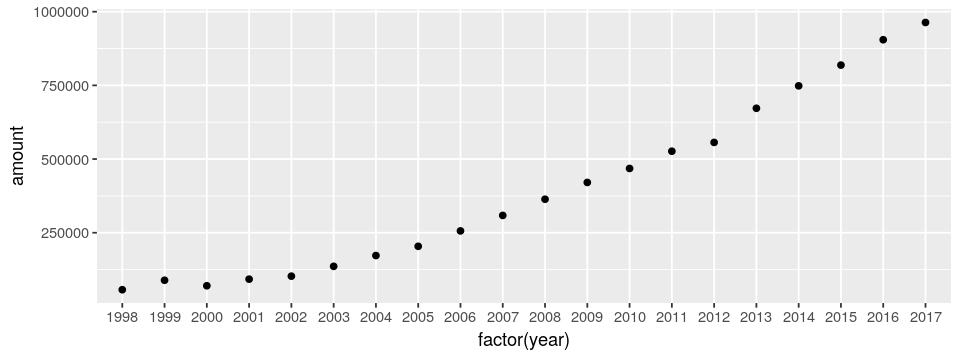

In [241]:
acts = acts %>% filter(year >= 1998)
moneyPerYear = acts %>% 
              group_by(year) %>% 
              filter(year < 2018) %>%
              summarise(amount = sum(amount))

ggplot(data = moneyPerYear, aes(x = factor(year), y = amount)) + geom_point()

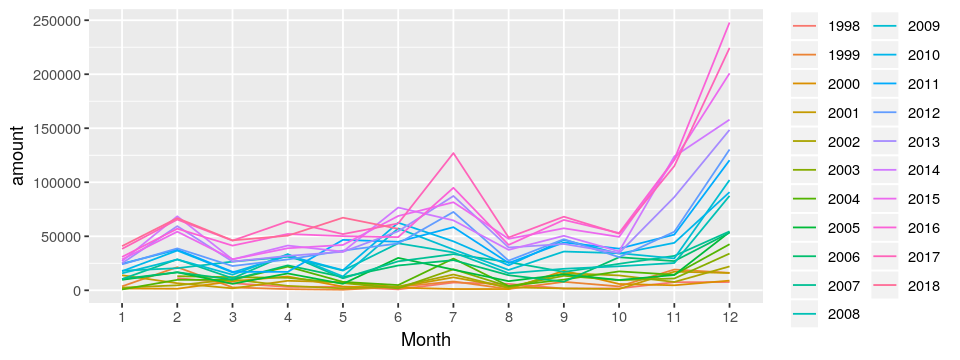

In [242]:
moneyPerMonth = acts %>% 
              group_by(year, month) %>% 
              summarise(amount = sum(amount))
ggplot(data = moneyPerMonth, aes(x = factor(month), y = amount))+
            geom_line(aes(color = factor(year), group=factor(year))) +
            xlab('Month') + labs(color = 'Year')

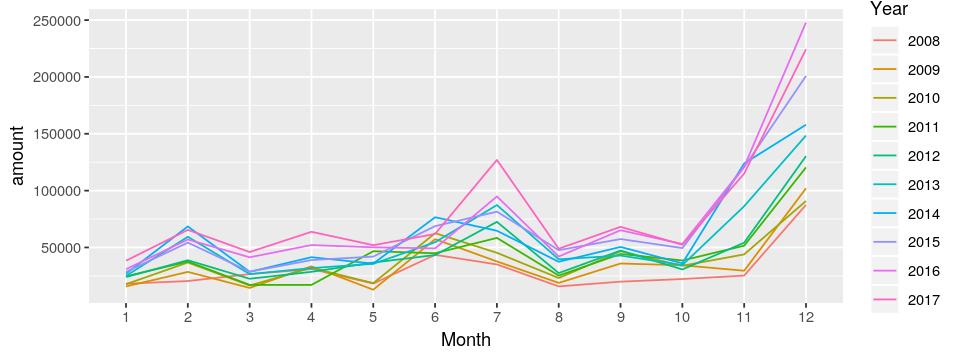

In [243]:
ggplot(data = moneyPerMonth %>% filter(year >= 2008 & year < 2018), 
       aes(x = factor(month), y = amount))+
       geom_line(aes(color = factor(year), group = factor(year))) +
        xlab('Month') + labs(color = 'Year')

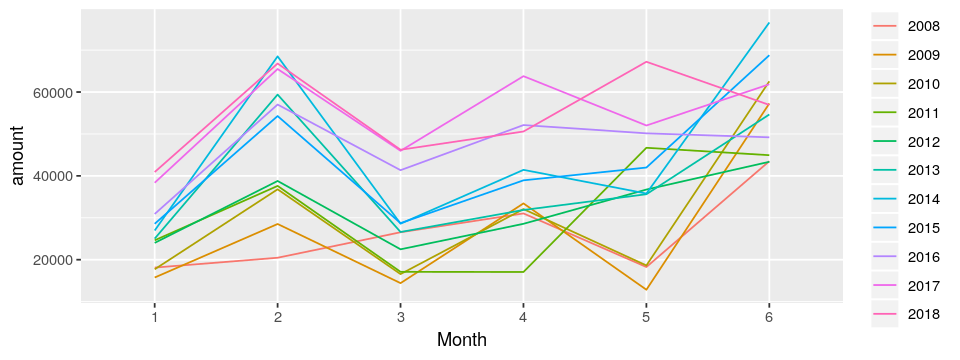

In [244]:
ggplot(data = moneyPerMonth %>% filter(year >= 2008 & month <= 6), 
       aes(x = factor(month), y = amount))+
       geom_line(aes(color = factor(year), group = factor(year))) +
        xlab('Month') + labs(color = 'Year')

Normally donations peak during June, but we see it's not the case for 2018. 

Why? No more ISF (tax)? June was not over yet when the data was retrieved?

## Difference between donations (DO) and automatic deductions (PA) <a class="anchor" id="f1.3"></a>

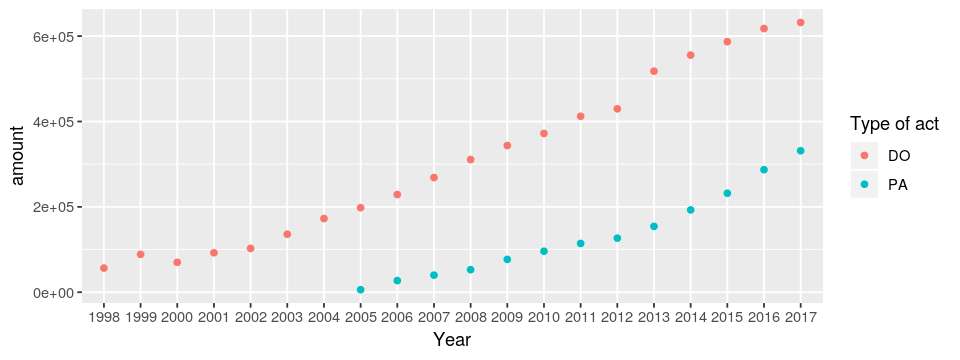

In [245]:
ggplot(data = acts %>% 
              group_by(year, act_type_id) %>% 
              filter(year < 2018) %>%
              summarise(amount = sum(amount)), 
       aes(x = factor(year), y = amount))+
       geom_point(aes(color = act_type_id)) +
        xlab('Year') + labs(color = 'Type of act')

There were no automatic deductions before 2005. 

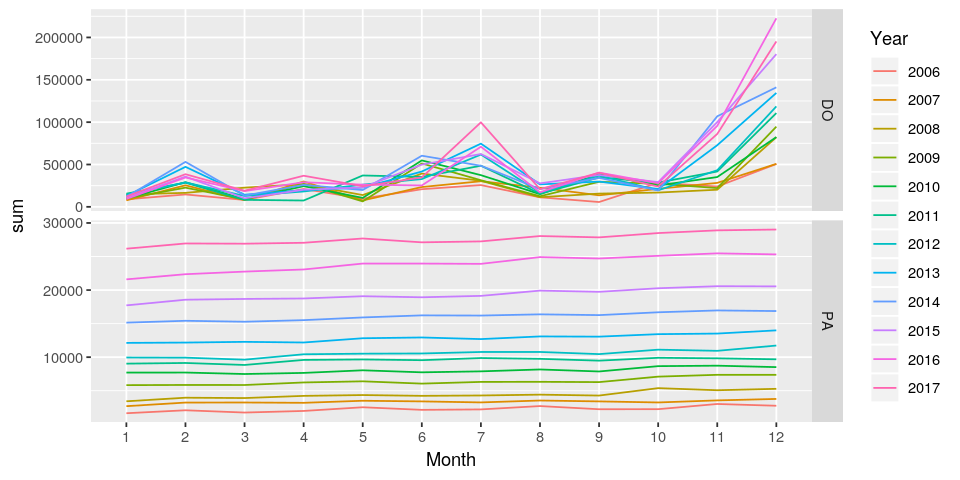

In [246]:
options(repr.plot.width=8, repr.plot.height=4)

amountPerActType = acts %>% 
        group_by(year, month, act_type_id) %>% 
        filter(year > 2005 & year < 2018) %>%
        summarise(sum = sum(amount))

ggplot(data = amountPerActType, aes(x = factor(month), y = sum))+
     geom_line(aes(color = factor(year), group = factor(year))) +
     facet_grid(act_type_id ~ ., scales='free') +
        xlab('Month') + labs(color = 'Year')

options(repr.plot.width=8, repr.plot.height=2.5)

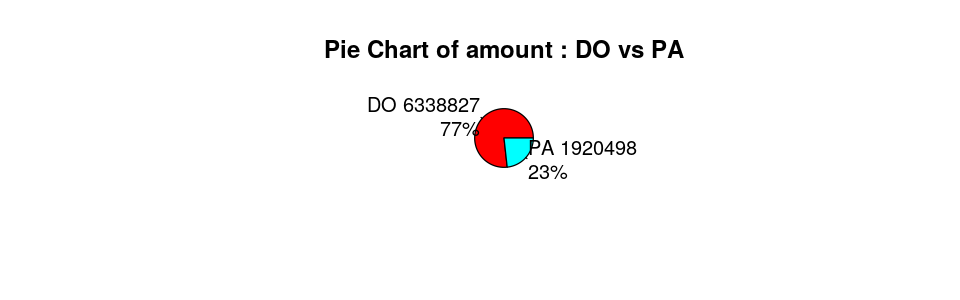

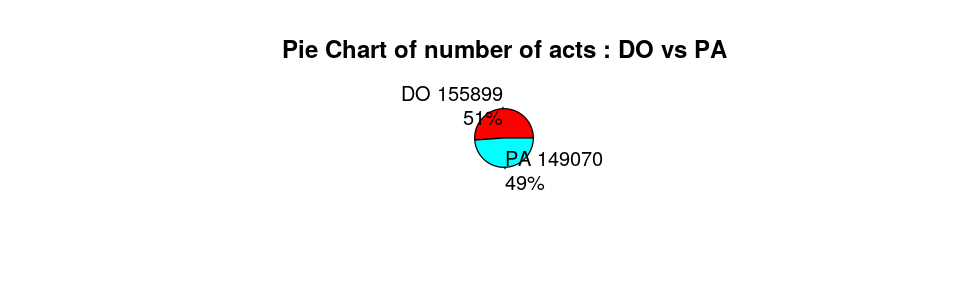

In [247]:
actsPerType = acts %>% 
    group_by(act_type_id) %>%
    summarise(amount = sum(amount), n = n()) 

slices <- c(actsPerType[[1,2]], actsPerType[[2,2]])
lbls <- c(as.character(actsPerType[[1,1]]), as.character(actsPerType[[2,1]]))
lbls <- paste(lbls, slices)
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct, sep="\n") 
lbls <- paste(lbls, "%", sep="")
pie(slices, labels = lbls, col=rainbow(length(lbls)), main="Pie Chart of amount : DO vs PA")

slices <- c(actsPerType[[1,3]], actsPerType[[2,3]])
lbls <- c(as.character(actsPerType[[1,1]]), as.character(actsPerType[[2,1]]))
lbls <- paste(lbls, slices)
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct, sep="\n") 
lbls <- paste(lbls, "%", sep="")
pie(slices, labels = lbls, col=rainbow(length(lbls)), main="Pie Chart of number of acts : DO vs PA")

There is almost as many donatioans as automatic deductions, but the amount spent on donations is much higher.

Is there a change of trend from 2005 to 2018?

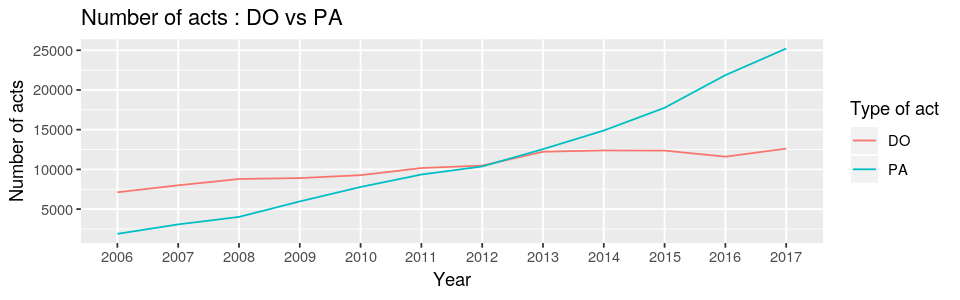

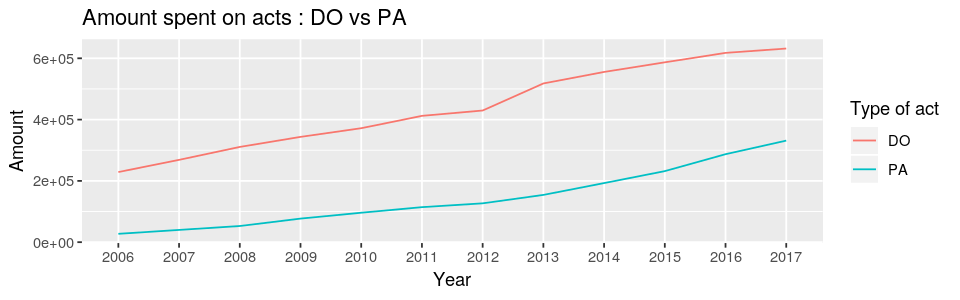

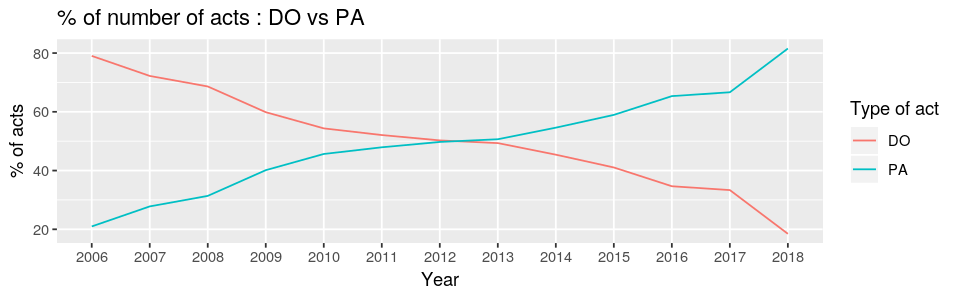

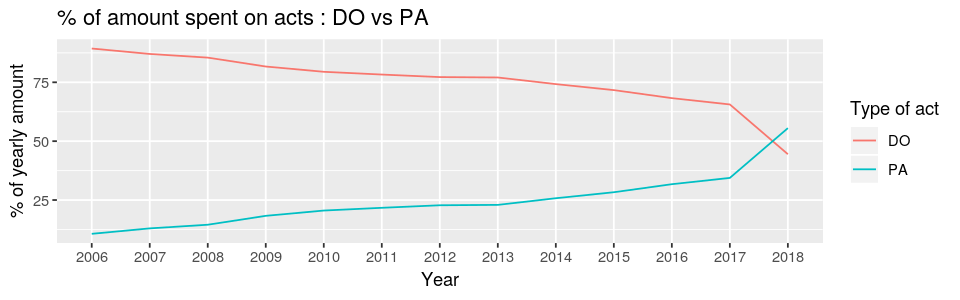

In [248]:
changeActType = acts %>% 
    group_by(year, act_type_id) %>%
    filter(year > 2005) %>%
    summarise(amount = sum(amount), n = n())

ggplot(data = changeActType %>% filter(year < 2018), 
    aes(x = factor(year), y = n))+
    geom_line(aes(color = act_type_id, group = act_type_id)) +
    ggtitle('Number of acts : DO vs PA') +
    xlab('Year') + ylab('Number of acts') + labs(color = 'Type of act')

ggplot(data = changeActType %>% filter(year < 2018), 
    aes(x = factor(year), y = amount))+
    geom_line(aes(color = act_type_id, group = act_type_id)) +
    ggtitle('Amount spent on acts : DO vs PA') +
    xlab('Year') + ylab('Amount') + labs(color = 'Type of act')

ggplot(data = changeActType %>%
    mutate(freq_n = 100*n / sum(n)), 
    aes(x = factor(year), y = freq_n))+
    geom_line(aes(color = act_type_id, group = act_type_id)) +
    ggtitle('% of number of acts : DO vs PA') +
    xlab('Year') + ylab('% of acts') + labs(color = 'Type of act')

ggplot(data = changeActType %>%
    mutate(freq_amount = 100*amount / sum(amount)), 
    aes(x = factor(year), y = freq_amount))+
    geom_line(aes(color = act_type_id, group = act_type_id)) +
    ggtitle('% of amount spent on acts : DO vs PA') +
    xlab('Year') + ylab('% of yearly amount') + labs(color = 'Type of act')

# CONTACTS tables : contacts and donors <a class="anchor" id="f2"></a>

## Data Transformation <a class="anchor" id="f2.1"></a>

In [249]:
str(contacts)

'data.frame':	74615 obs. of  7 variables:
 $ id              : num  70 90 110 120 130 140 150 160 170 190 ...
 $ prefix_id       : chr  "MME" "MME" "MR" "MME" ...
 $ first_name_clean: chr  "MURIELLE" "EMILIE" "GERARD" "MARIE" ...
 $ zip_code        : chr  "73160" "45410" "62138" "76520" ...
 $ town_clean      : chr  "COGNIN" "SOUGY" "DOUVRIN" "FRANQUEVILLE-SAINT-PIERRE" ...
 $ code_geo        : chr  "73087" "45313" "62276" "76475" ...
 $ active          : num  1 1 1 1 1 1 1 1 1 1 ...


In [250]:
contacts$active = factor(contacts$active)
contacts$prefix_id = factor(contacts$prefix_id)
contacts$region = substr(contacts$zip_code, 1, 2)
str(contacts)

'data.frame':	74615 obs. of  8 variables:
 $ id              : num  70 90 110 120 130 140 150 160 170 190 ...
 $ prefix_id       : Factor w/ 7 levels "AU","DR","MLLE",..: 4 4 6 4 6 6 4 4 6 4 ...
 $ first_name_clean: chr  "MURIELLE" "EMILIE" "GERARD" "MARIE" ...
 $ zip_code        : chr  "73160" "45410" "62138" "76520" ...
 $ town_clean      : chr  "COGNIN" "SOUGY" "DOUVRIN" "FRANQUEVILLE-SAINT-PIERRE" ...
 $ code_geo        : chr  "73087" "45313" "62276" "76475" ...
 $ active          : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ region          : chr  "73" "45" "62" "76" ...


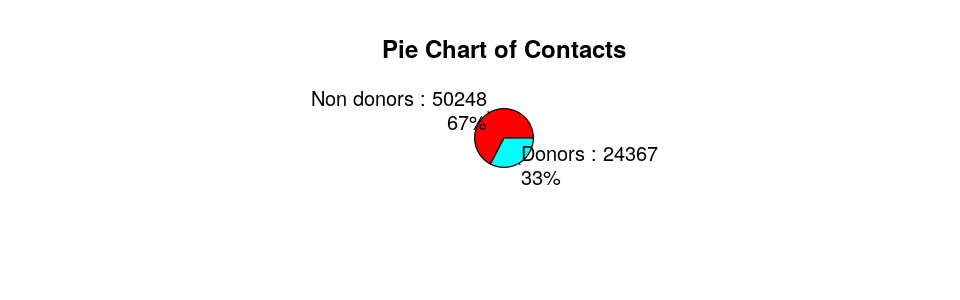

In [251]:
donors_acts = inner_join(contacts, acts, by = c("id" = "contact_id"))
nb_donors = (donors_acts %>% group_by(id) %>% summarise() %>% count())$n

slices <- c((contacts %>% anti_join(acts, by = c("id" = "contact_id")) %>% count())$n, 
            nb_donors)
lbls <- c("Non donors :", "Donors :")
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, slices) 
lbls <- paste(lbls, pct, sep="\n")
lbls <- paste(lbls, "%", sep="") 
pie(slices, labels = lbls, col=rainbow(length(lbls)), main="Pie Chart of Contacts")

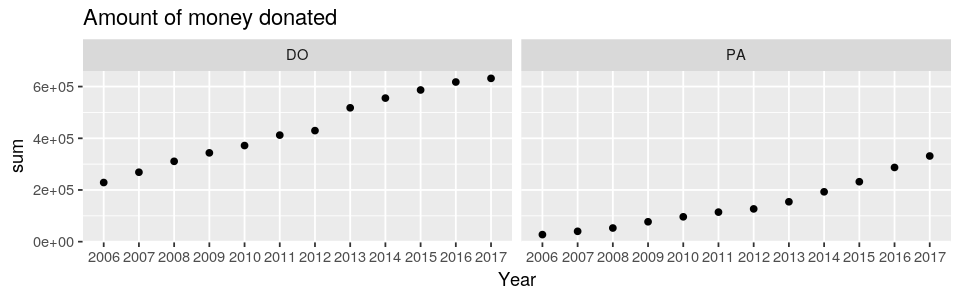

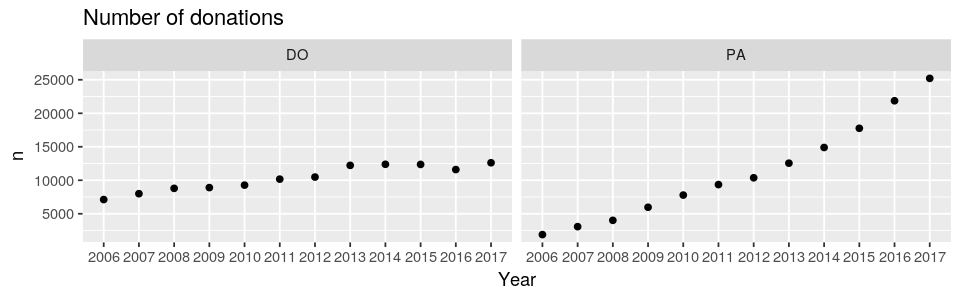

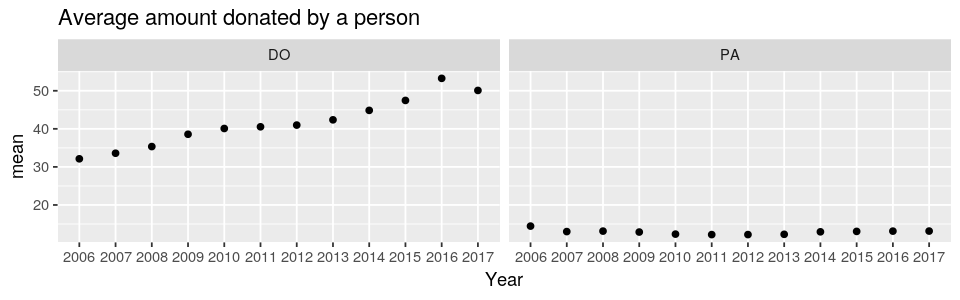

In [252]:
donationsPerPerson = donors_acts %>% 
    filter(year > 2005 & year < 2018) %>%
    group_by(year, act_type_id) %>%
    summarise(sum = sum(amount), mean = mean(amount), n=n())

ggplot(data = donationsPerPerson, 
       aes(x = factor(year), y = sum, group = factor(year)))+
    geom_point() +
    facet_grid(. ~ act_type_id) +
    ggtitle('Amount of money donated') +
    xlab('Year')

ggplot(data = donationsPerPerson, 
       aes(x = factor(year), y = n, group = factor(year)))+
    geom_point() +
    facet_grid(. ~ act_type_id) +
    ggtitle('Number of donations') +
    xlab('Year')

ggplot(data = donationsPerPerson, 
       aes(x = factor(year), y = mean, group = factor(year)))+
    geom_point() +
    facet_grid(. ~ act_type_id) +
    ggtitle('Average amount donated by a person') +
    xlab('Year')

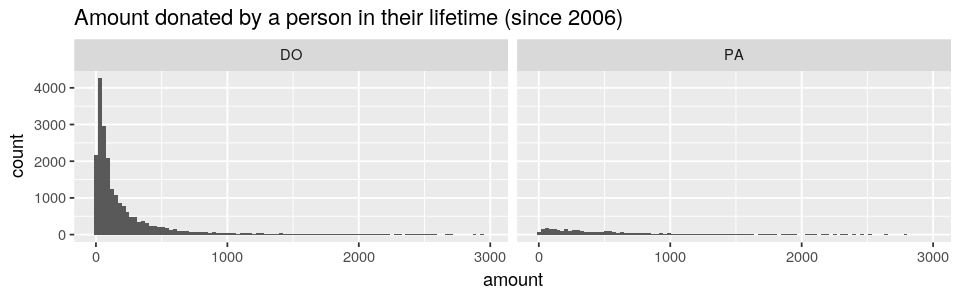

In [253]:
ggplot(data = donors_acts %>% 
                filter(year >= 2006) %>%
                group_by(id, act_type_id) %>% 
                summarise(amount = sum(amount)) %>%
                filter(amount < 3000), 
       aes(x = amount)) +
       geom_histogram(binwidth = 30) +
       facet_grid(. ~ act_type_id) +
       ggtitle('Amount donated by a person in their lifetime (since 2006)')

## Recent donors <a class="anchor" id="f2.2"></a>

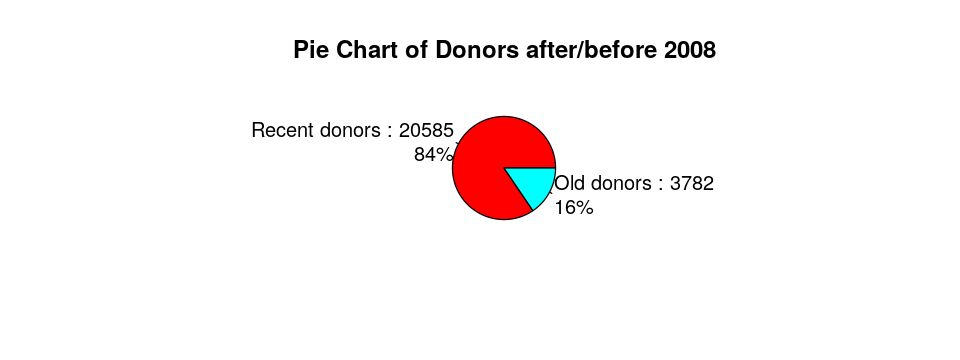

In [282]:
recent = 2008

recent_donors_acts = inner_join(contacts, acts %>% filter(year >= recent), 
                                   by = c("id" = "contact_id"))

slices <- c((recent_donors_acts %>% group_by(id) %>% summarise() %>% count())$n, 
            nb_donors - (recent_donors_acts %>% group_by(id) %>% summarise() %>% count())$n)
lbls <- c("Recent donors :", "Old donors :")
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, slices)
lbls <- paste(lbls, pct, sep="\n")
lbls <- paste(lbls, "%", sep="") 
pie(slices, labels = lbls, col=rainbow(length(lbls)), 
    main=paste("Pie Chart of Donors after/before", recent))

In [255]:
100*nrow(recent_donors_acts %>% filter(active == 1))/nrow(recent_donors_acts)

[1] 93,08206

## Evolution of PA and DO donors <a class="anchor" id="f2.3"></a>

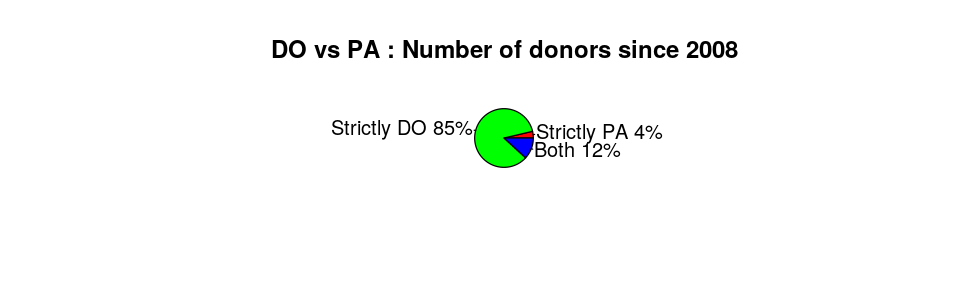

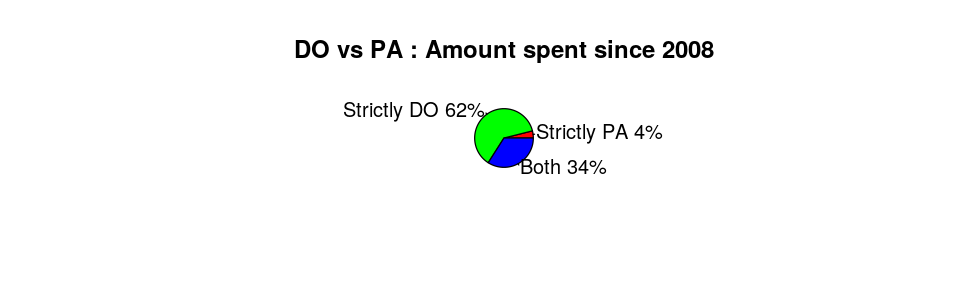

In [256]:
pa_donors_acts = recent_donors_acts %>% 
    filter(act_type_id == 'PA')
do_donors_acts = recent_donors_acts %>% 
    filter(act_type_id == 'DO')

pa_donors = pa_donors_acts %>% 
    anti_join(do_donors_acts, by="id")
do_donors = do_donors_acts %>% 
    anti_join(pa_donors_acts, by="id")
both_donors = rbind(pa_donors_acts %>% 
                        semi_join(do_donors_acts, by="id"),
                    do_donors_acts %>%
                        semi_join(pa_donors_acts, by='id'))

slices <- c((pa_donors %>% group_by(id) %>% summarise() %>% count())$n, 
            (do_donors %>% group_by(id) %>% summarise() %>% count())$n, 
            (both_donors %>% group_by(id) %>% summarise() %>% count())$n)
lbls <- c('Strictly PA', 'Strictly DO', 'Both')
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct) 
lbls <- paste(lbls, "%", sep="")
pie(slices, labels = lbls, col=rainbow(length(lbls)), 
    main = paste("DO vs PA : Number of donors since", recent))

slices <- c((pa_donors %>% 
                 summarise(amount = sum(amount)))$amount, 
            (do_donors %>% 
                 summarise(amount = sum(amount)))$amount,
            (both_donors %>% 
                 summarise(amount = sum(amount)))$amount)
lbls <- c('Strictly PA', 'Strictly DO', 'Both')
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct) 
lbls <- paste(lbls, "%", sep="")
pie(slices, labels = lbls, col=rainbow(length(lbls)), 
    main = paste("DO vs PA : Amount spent since", recent))

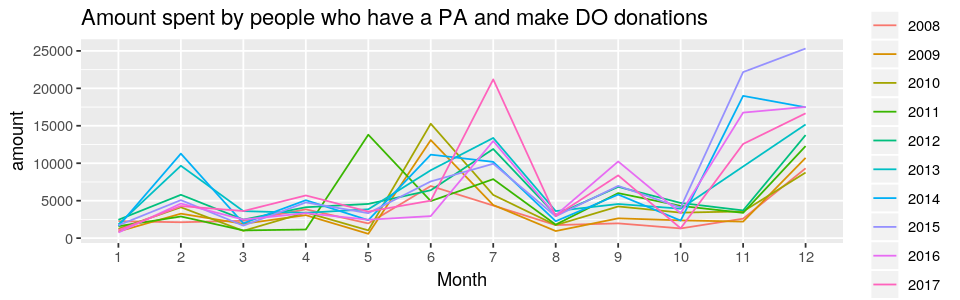

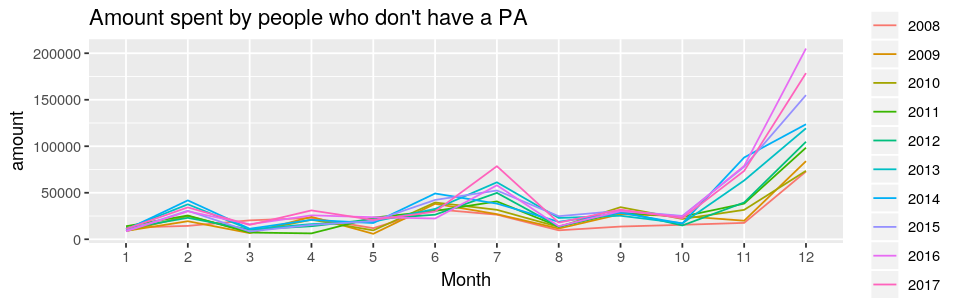

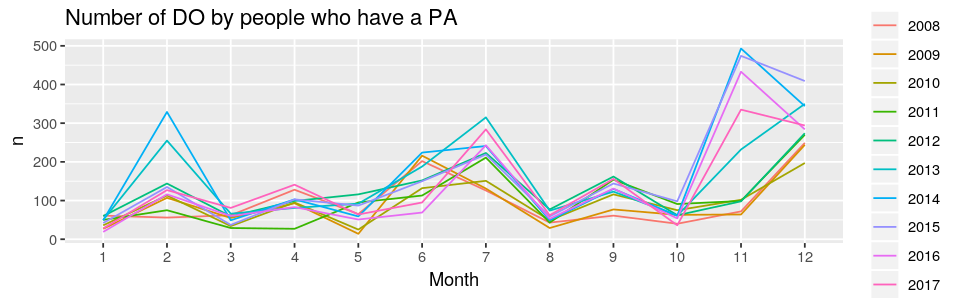

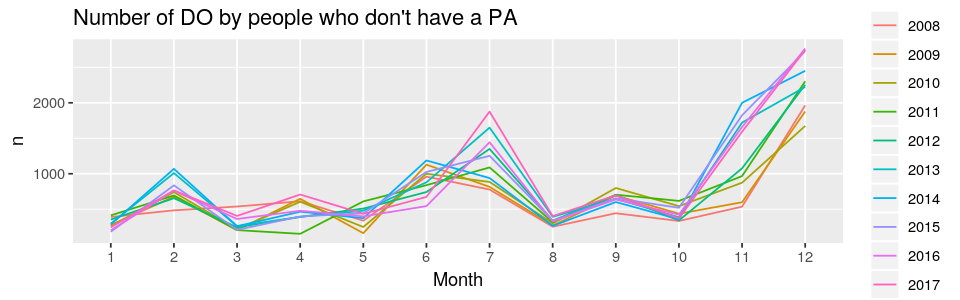

In [257]:
bilan_both = both_donors %>% 
          filter(year < 2018 & act_type_id == 'DO') %>%
          group_by(year, month) %>%
          summarise(amount = sum(amount), n=n())

bilan_do = do_donors %>% 
          filter(year < 2018) %>%
          group_by(year, month) %>%
          summarise(amount = sum(amount), n=n())

ggplot(data = bilan_both, aes(x = factor(month), y = amount))+
     geom_line(aes(color = factor(year), group = factor(year))) +
     ggtitle('Amount spent by people who have a PA and make DO donations') +
     xlab('Month') + labs(color = 'Year')

ggplot(data = bilan_do, aes(x = factor(month), y = amount))+
     geom_line(aes(color = factor(year), group = factor(year))) +
     ggtitle('Amount spent by people who don\'t have a PA') +
     xlab('Month') + labs(color = 'Year')

ggplot(data = bilan_both, aes(x = factor(month), y = n))+
     geom_line(aes(color = factor(year), group = factor(year))) +
     ggtitle('Number of DO by people who have a PA') +
     xlab('Month') + labs(color = 'Year') 

ggplot(data = bilan_do, aes(x = factor(month), y = n))+
     geom_line(aes(color = factor(year), group = factor(year))) +
     ggtitle('Number of DO by people who don\'t have a PA') +
     xlab('Month') + labs(color = 'Year')

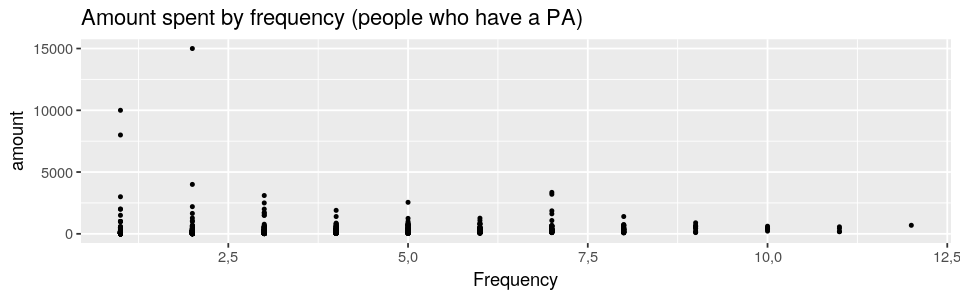

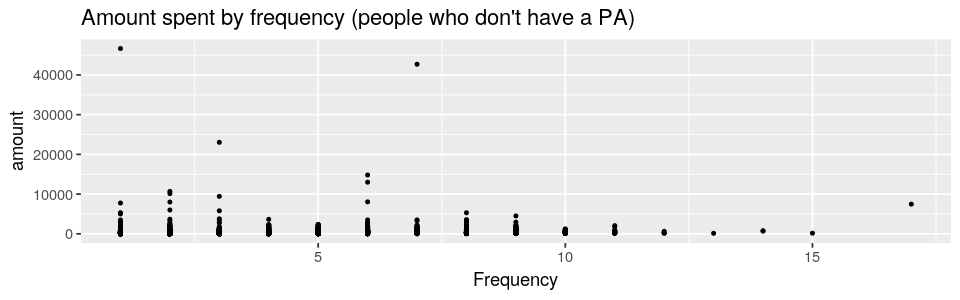

In [258]:
ggplot(data = both_donors %>% 
          filter(act_type_id == 'DO') %>%
          group_by(month, id) %>%
          summarise(amount = sum(amount), n = n()), 
       aes(x = n, y = amount))+
     geom_point(size = 0.75) +
     ggtitle('Amount spent by frequency (people who have a PA)') +
     xlab('Frequency') 

ggplot(data = do_donors %>% 
       group_by(month, id) %>%
          summarise(amount = sum(amount), n = n()), 
       aes(x = n, y = amount))+
     geom_point(size = 0.75) +
     ggtitle('Amount spent by frequency (people who don\'t have a PA)') +
     xlab('Frequency') 

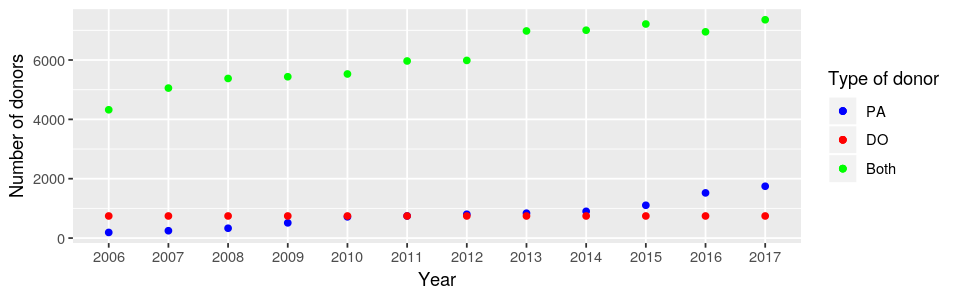

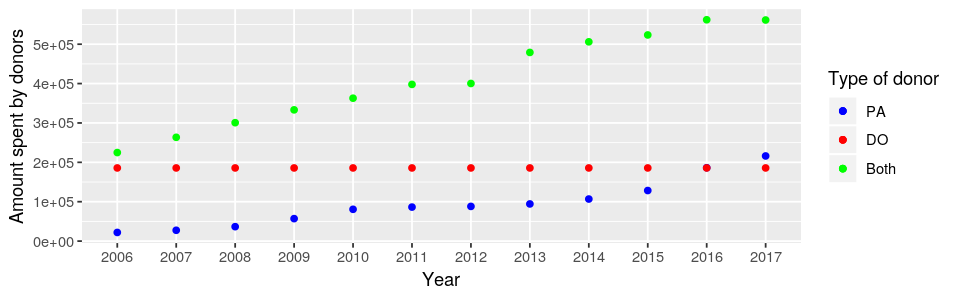

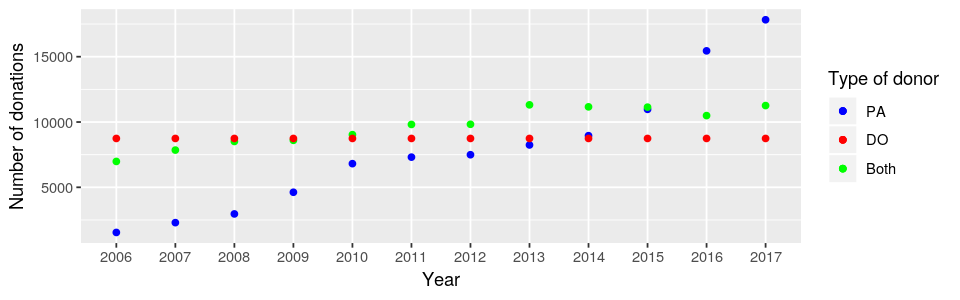

In [259]:
interval = 2006:2017

# Number of donors who made ONLY PA acts in a certain year
nb_pa_donors = vector(length = length(interval))
# Number of donors who made ONLY DO acts in a certain year 
nb_do_donors = vector(length = length(interval))
# Number of donors who made both types acts in a certain year 
nb_both_donors = vector(length = length(interval))

amount_pa_donors = vector(length = length(interval))
amount_do_donors = vector(length = length(interval))
amount_both_donors = vector(length = length(interval))

acts_pa_donors = vector(length = length(interval))
acts_do_donors = vector(length = length(interval))
acts_both_donors = vector(length = length(interval))

i = 1
for(y in interval) {
    recent_donors_acts_y = inner_join(contacts, acts %>% filter(year == y), 
                                   by = c("id" = "contact_id"))
    
    # Donors who make PA acts, but could also make DO ones
    pa_donors_acts_y = recent_donors_acts_y %>% 
        filter(act_type_id == 'PA')
    # Donors who make DO acts, but could also make PA ones
    do_donors_acts_y = recent_donors_acts_y %>% 
        filter(act_type_id == 'DO')
    
    nb_pa_donors[i] = (pa_donors_acts_y %>% 
        anti_join(do_donors_acts_y, by="id") %>%
        group_by(id) %>% summarise() %>%
        count())$n
    nb_do_donors[i] = (do_donors_acts_y %>% 
        anti_join(pa_donors_acts_y, by="id") %>%
        group_by(id) %>% summarise() %>%
        count())$n
    nb_both_donors = (pa_donors_acts_y %>% 
        semi_join(do_donors_acts_y, by="id") %>%
        group_by(id) %>% summarise() %>%
        count())$n
    
    # PA acts of contacts who used both PA and DO
    pa_do = pa_donors_acts_y %>% 
        semi_join(do_donors_acts_y, by="id")
    # DO acts of contacts who used both PA and DO
    do_pa = do_donors_acts_y %>% 
        semi_join(pa_donors_acts_y, by="id")
    
    amount_pa_donors[i] = (pa_donors_acts_y %>% 
        anti_join(do_donors_acts_y, by="id") %>%
        group_by(year) %>%
        summarise(amount = sum(amount)))$amount
    amount_do_donors[i] = (do_donors_acts_y %>% 
        anti_join(pa_donors_acts_y, by="id") %>%
        summarise(amount = sum(amount)))$amount
    amount_both_donors = (rbind(pa_do, do_pa) %>%
        summarise(amount = sum(amount)))$amount
    
    acts_pa_donors[i] = (pa_donors_acts_y %>% 
        anti_join(do_donors_acts_y, by="id") %>%
        count())$n
    acts_do_donors[i] = (do_donors_acts_y %>% 
        anti_join(pa_donors_acts_y, by="id") %>%
        count())$n
    acts_both_donors = (rbind(pa_do, do_pa) %>%
        count())$n
    
    i = i + 1
}

donors = data.frame(year = interval, 
            nb_pa = nb_pa_donors, nb_do = nb_do_donors, nb_both = nb_both_donors,
            amount_pa = amount_pa_donors, amount_do = amount_do_donors, amount_both = amount_both_donors,
            acts_pa = acts_pa_donors, acts_do = acts_do_donors, acts_both = acts_both_donors)

ggplot(data = donors, aes(group = factor(year))) + 
    geom_point(aes(x = factor(year), y = nb_pa, color = 'blue')) +
    geom_point(aes(x = factor(year), y = nb_do, color = 'red')) +
    geom_point(aes(x = factor(year), y = nb_both, color = 'green')) +
    xlab('Year') + ylab('Number of donors') +
    labs(color = 'Type of donor') + 
    scale_color_manual(labels = c("PA", "DO", "Both"), values = c("blue", "red", "green"))

ggplot(data = donors, aes(group = factor(year))) + 
    geom_point(aes(x = factor(year), y = amount_pa, color = 'blue')) +
    geom_point(aes(x = factor(year), y = amount_do, color = 'red')) +
    geom_point(aes(x = factor(year), y = amount_both, color = 'green')) +
    xlab('Year') + ylab('Amount spent by donors') +
    labs(color = 'Type of donor') + 
    scale_color_manual(labels = c("PA", "DO", "Both"), values = c("blue", "red", "green"))

ggplot(data = donors, aes(group = factor(year))) + 
    geom_point(aes(x = factor(year), y = acts_pa, color = 'blue')) +
    geom_point(aes(x = factor(year), y = acts_do, color = 'red')) +
    geom_point(aes(x = factor(year), y = acts_both, color = 'green')) +
    xlab('Year') + ylab('Number of donations') +
    labs(color = 'Type of donor') + 
    scale_color_manual(labels = c("PA", "DO", "Both"), values = c("blue", "red", "green"))

## Donors by Region <a class="anchor" id="f2.4"></a>

In [260]:
recent_donors_acts = recent_donors_acts[complete.cases(recent_donors_acts[, 'zip_code']),]
recent_donors_acts$france = as.numeric(recent_donors_acts$region < 'A')
recent_donors_acts$france[is.na(recent_donors_acts$france)] = 0
recent_donors_acts$france = factor(recent_donors_acts$france)
table(recent_donors_acts$france)


     0      1 
    67 255585 

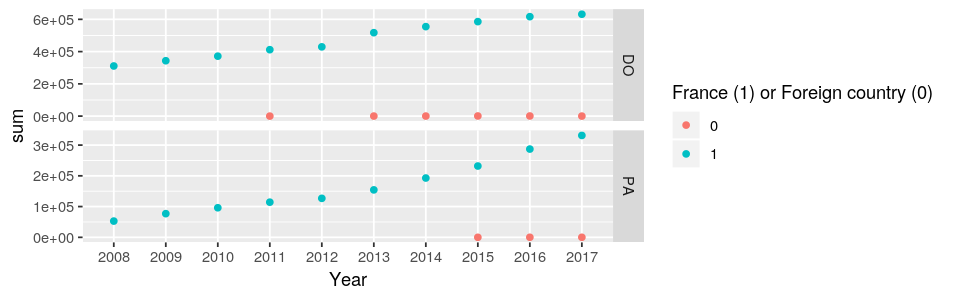

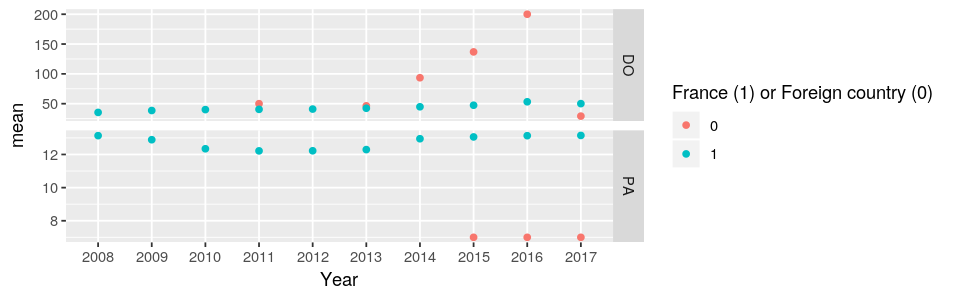

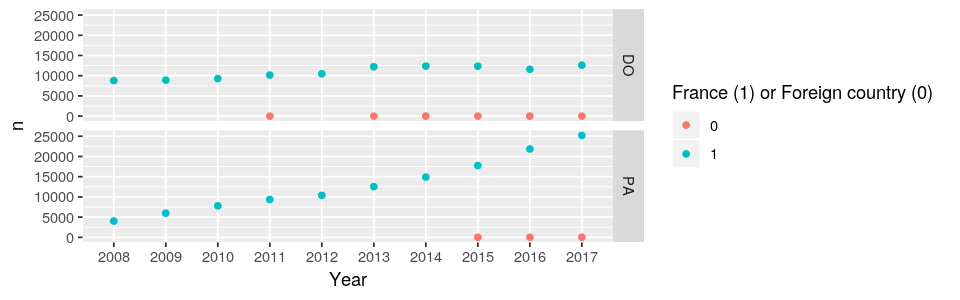

In [261]:
data = recent_donors_acts %>% 
       filter(year < 2018) %>%
    group_by(year, act_type_id, france) %>%
    summarise(sum = sum(amount), mean = mean(amount), n = n())

ggplot(data = data, 
       aes(x = factor(year), y = sum))+
     geom_point(aes(color = france)) +
     facet_grid(act_type_id ~ ., scales='free') +
        xlab('Year') + labs(color = 'France (1) or Foreign country (0)')

ggplot(data = data, 
       aes(x = factor(year), y = mean))+
     geom_point(aes(color = france)) +
     facet_grid(act_type_id ~ ., scales='free') +
        xlab('Year') + labs(color = 'France (1) or Foreign country (0)')

ggplot(data = data, 
       aes(x = factor(year), y = n))+
     geom_point(aes(color = france)) +
     facet_grid(act_type_id ~ .) +
        xlab('Year') + labs(color = 'France (1) or Foreign country (0)')

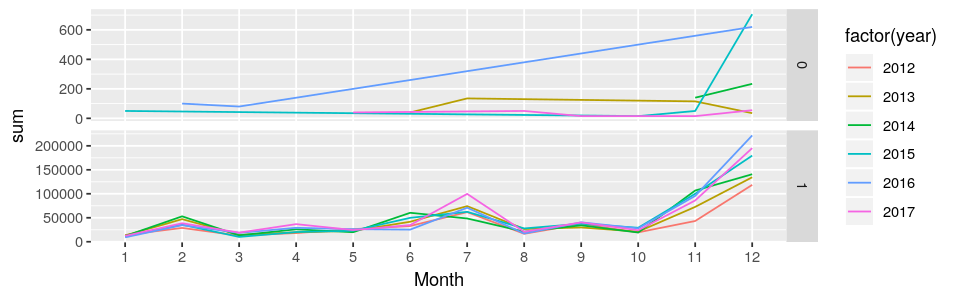

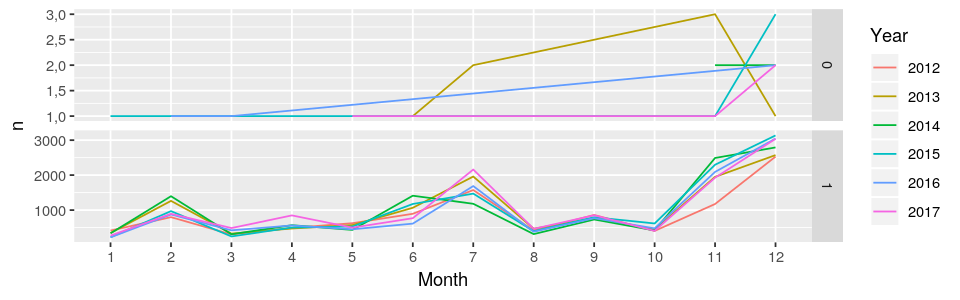

In [262]:
data = recent_donors_acts %>% 
          filter(act_type_id == 'DO' & year < 2018 & year >= 2012) %>%
          group_by(year, month, france) %>%
          summarise(sum = sum(amount), n = n())

ggplot(data = data, 
     aes(x = factor(month), y = sum))+
     geom_line(aes(color = factor(year), group = factor(year))) +
     facet_grid(france ~ ., scales='free') + 
     xlab('Month') + labs(colors = 'Year')

ggplot(data = data, 
     aes(x = factor(month), y = n))+
     geom_line(aes(color = factor(year), group = factor(year))) +
     facet_grid(france ~ ., scales='free') + 
     xlab('Month') + labs(color = 'Year')

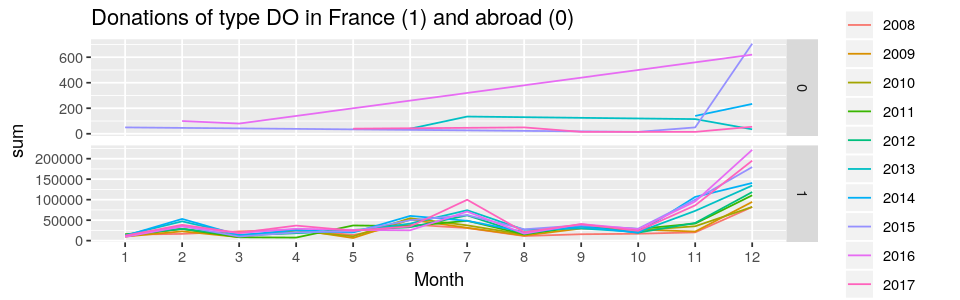

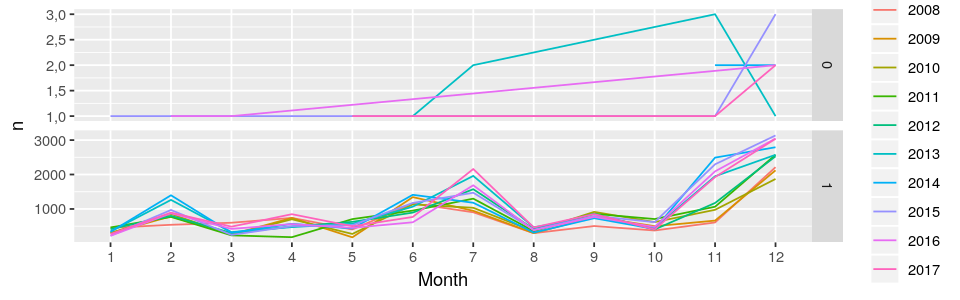

In [263]:
data = recent_donors_acts %>% 
          filter(act_type_id == 'DO' & year < 2018 & year >= 2008) %>%
          group_by(year, month, france) %>%
          summarise(sum = sum(amount), mean = mean(amount), n = n())

ggplot(data = data, 
     aes(x = factor(month), y = sum))+
     geom_line(aes(color = factor(year), group = factor(year))) +
     facet_grid(france ~ ., scales='free') + 
     xlab('Month') + labs(colors = 'Year') +
     ggtitle('Donations of type DO in France (1) and abroad (0)')

ggplot(data = data, 
     aes(x = factor(month), y = n))+
     geom_line(aes(color = factor(year), group = factor(year))) +
     facet_grid(france ~ ., scales='free') + 
     xlab('Month') + labs(color = 'Year')

In [279]:
region = read.csv('region.csv')
str(region)

'data.frame':	101 obs. of  5 variables:
 $ X              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ department     : Factor w/ 101 levels "AIN","AISNE",..: 33 64 86 78 77 13 94 93 44 51 ...
 $ region         : Factor w/ 27 levels "ALSACE","AQUITAINE",..: 20 8 14 3 21 25 14 14 16 7 ...
 $ code_department: Factor w/ 97 levels "01","02","03",..: 33 52 78 64 63 13 95 96 88 38 ...
 $ code_region    : int  73 21 11 83 31 93 11 11 74 24 ...


In [280]:
table(region$region)


                    ALSACE                  AQUITAINE 
                         2                          5 
                  AUVERGNE            BASSE-NORMANDIE 
                         4                          3 
                 BOURGOGNE                   BRETAGNE 
                         4                          4 
                    CENTRE          CHAMPAGNE-ARDENNE 
                         6                          4 
                     CORSE              FRANCHE-COMTE 
                         2                          4 
                GUADELOUPE                     GUYANE 
                         1                          1 
           HAUTE-NORMANDIE              ILE-DE-FRANCE 
                         2                          8 
      LANGUEDOC-ROUSSILLON                   LIMOUSIN 
                         5                          3 
                  LORRAINE                 MARTINIQUE 
                         4                          1 
         

In [281]:
region$region = as.character(region$region)

for(i in 1:nrow(region)) {
    if(str_detect(region[i, 'region'], 'MIDI') | str_detect(region[i, 'region'], 'LANG')) {
        region[i, 'region'] = 'LANGUEDOC-ROUSSILLON MIDI-PYRENEES'
    } else if(str_detect(region[i, 'region'], 'NORMANDIE')) {
        region[i, 'region'] = 'NORMANDIE'
    } else if(str_detect(region[i, 'region'], 'NORD') | str_detect(region[i, 'region'], 'PICARDIE')) {
        region[i, 'region'] = 'NORD-PAS-DE-CALAIS PICARDIE'
    } else if(str_detect(region[i, 'region'], 'BOURGOGNE') | str_detect(region[i, 'region'], 'FRANCHE')) {
        region[i, 'region'] = 'BOURGOGNE FRANCHE-COMTE'
    } else if(str_detect(region[i, 'region'], 'ALSACE') | str_detect(region[i, 'region'], 'LORRAINE') |
             str_detect(region[i, 'region'], 'CHAMPAGNE')) {
        region[i, 'region'] = 'ALSACE CHAMPAGNE-ARDENNE LORRAINE'
    } else if(str_detect(region[i, 'region'], 'AUVERGNE') | str_detect(region[i, 'region'], 'RHONE')) {
        region[i, 'region'] = 'AUVERGNE RHONE-ALPES'
    } else if(str_detect(region[i, 'region'], 'AQUITAINE') | str_detect(region[i, 'region'], 'LIMOUSIN') |
             str_detect(region[i, 'region'], 'POITOU')) {
        region[i, 'region'] = 'AQUITAINE LIMOUSIN POITOU-CHARENTES'
    } else if(str_detect(region[i, 'region'], 'PROVINCE') | str_detect(region[i, 'region'], 'AZUR')) {
        region[i, 'region'] = 'PROVINCE-ALPES COTE D\' AZUR'
    } else if(str_detect(region[i, 'region'], 'CENTRE') | str_detect(region[i, 'region'], 'ILE')) {
        
    } else {
        region[i, 'region'] = NA
    }
}
region = na.omit(region)
        
table(region$region)


  ALSACE CHAMPAGNE-ARDENNE LORRAINE AQUITAINE LIMOUSIN POITOU-CHARENTES 
                                 10                                  12 
               AUVERGNE RHONE-ALPES             BOURGOGNE FRANCHE-COMTE 
                                 12                                   8 
                             CENTRE                       ILE-DE-FRANCE 
                                  6                                   8 
 LANGUEDOC-ROUSSILLON MIDI-PYRENEES         NORD-PAS-DE-CALAIS PICARDIE 
                                 13                                   5 
                          NORMANDIE         PROVINCE-ALPES COTE D' AZUR 
                                  5                                   6 

In [283]:
recent_donors_acts = left_join(recent_donors_acts, region, by = c("region" = "code_department"))
recent_donors_acts$region.y[is.na(recent_donors_acts$region.y)] = 'Hors-France'
str(recent_donors_acts)

Warning message:
“Column `region`/`code_department` joining character vector and factor, coercing into character vector”

'data.frame':	255683 obs. of  22 variables:
 $ id               : num  160 160 160 410 410 410 410 410 410 410 ...
 $ prefix_id        : Factor w/ 7 levels "AU","DR","MLLE",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ first_name_clean : chr  "CLAUDINE" "CLAUDINE" "CLAUDINE" "CHANTAL" ...
 $ zip_code         : chr  "10300" "10300" "10300" "77290" ...
 $ town_clean       : chr  "SAINTE-SAVINE" "SAINTE-SAVINE" "SAINTE-SAVINE" "MITRY-MORY" ...
 $ code_geo         : chr  "10362" "10362" "10362" "77294" ...
 $ active           : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ region           : chr  "10" "10" "10" "77" ...
 $ id.y             : num  284 285 286 920 921 922 923 924 925 926 ...
 $ amount           : num  20 20 20 25 30 30 30 30 30 30 ...
 $ act_date         : Date, format: "2008-03-02" "2009-09-23" ...
 $ act_type_id      : Factor w/ 2 levels "DO","PA": 1 1 1 1 1 1 1 1 1 1 ...
 $ payment_method_id: Factor w/ 6 levels "AU","CB","CH",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ channel_id       : Fa

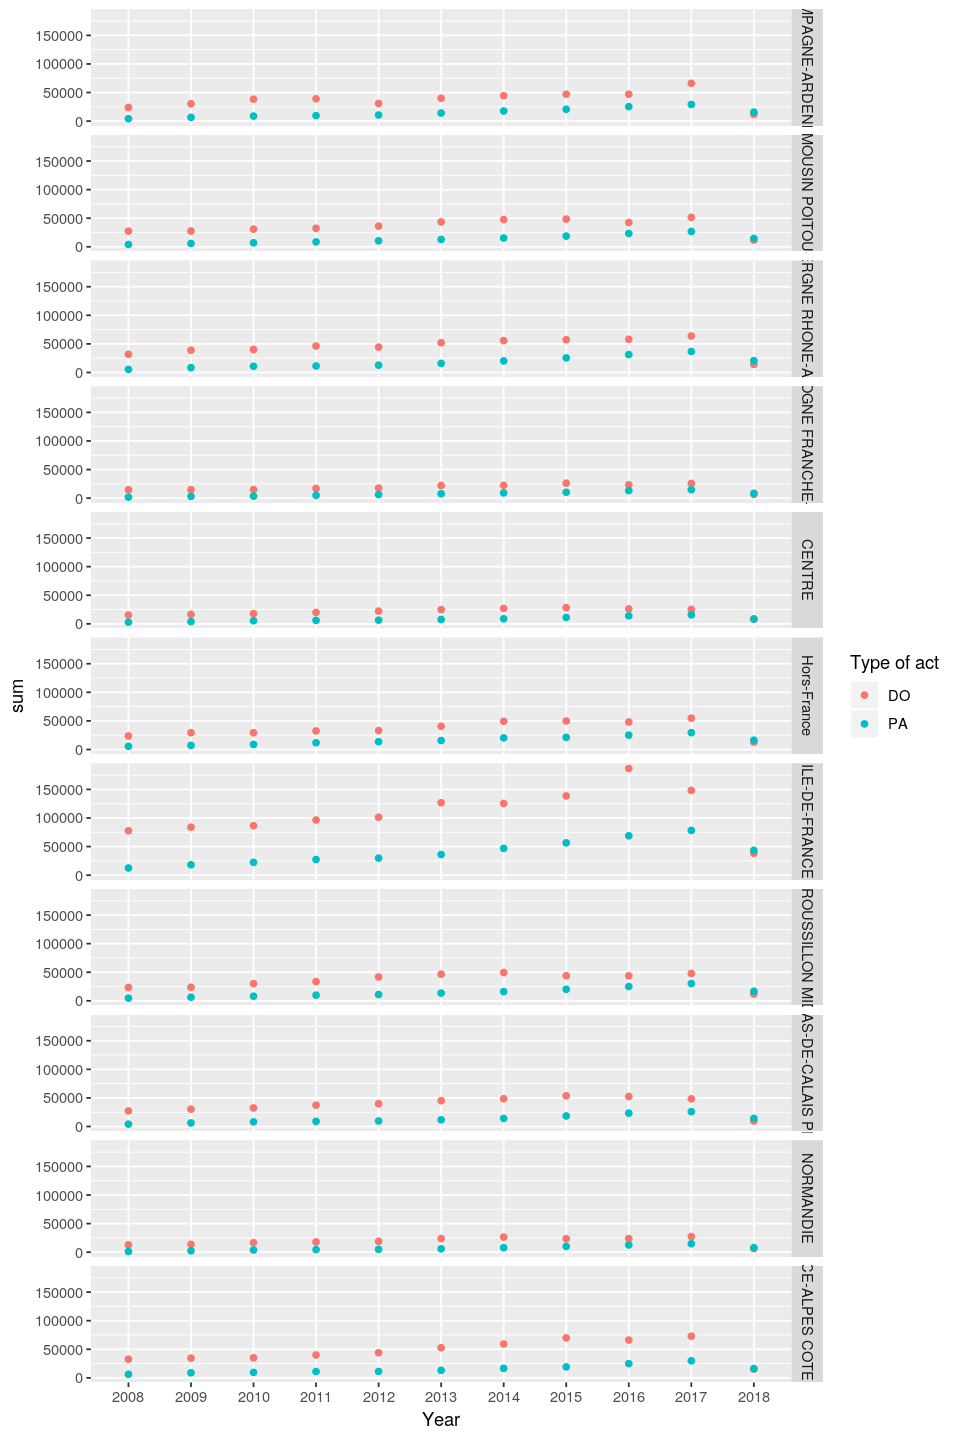

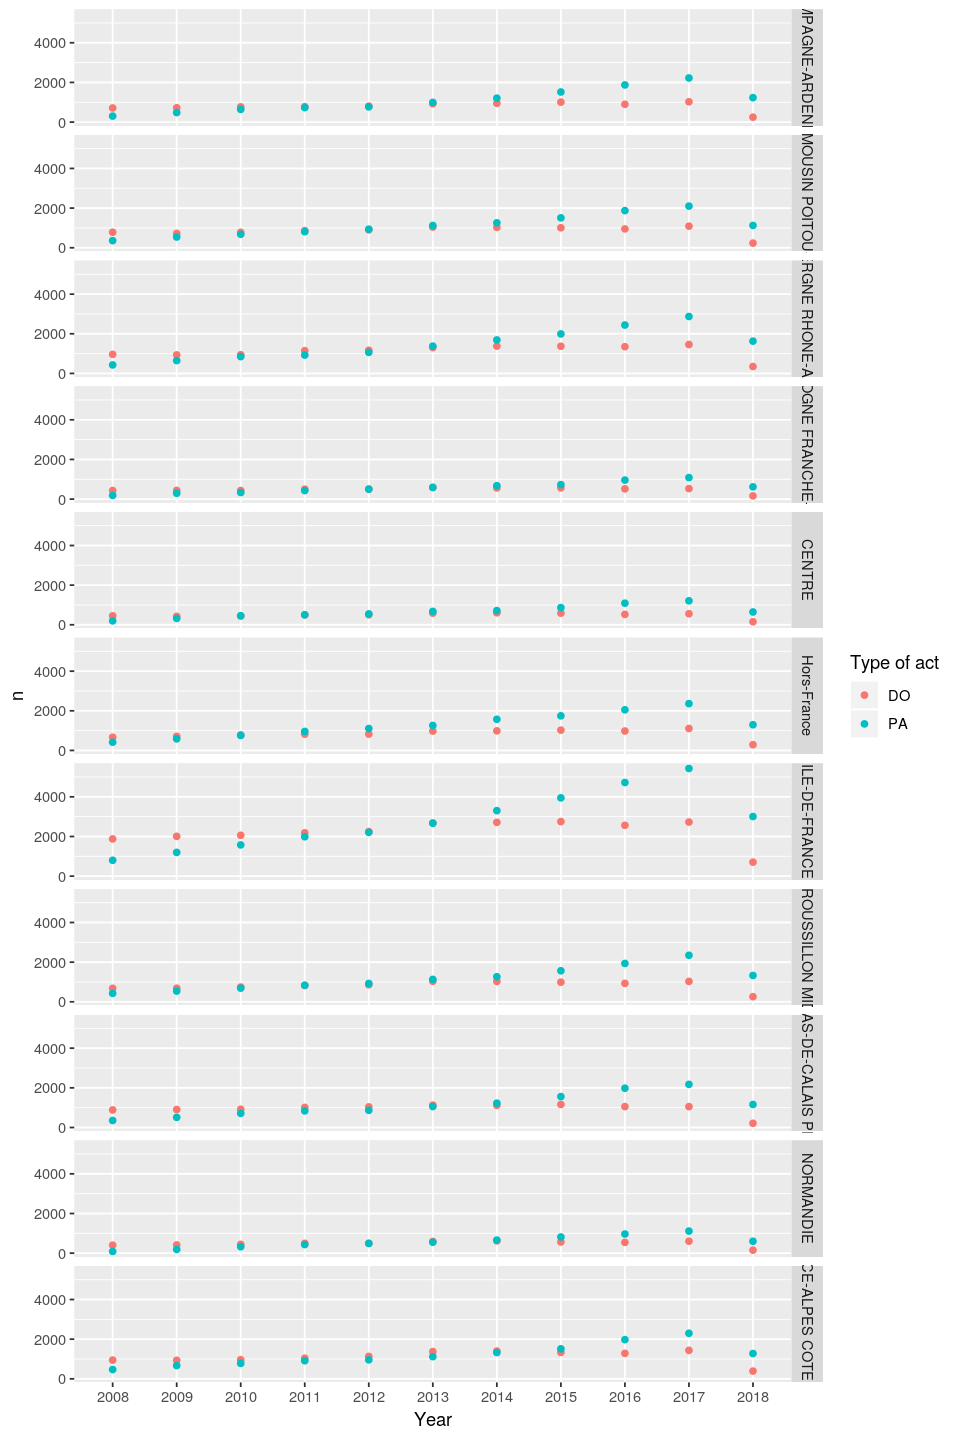

In [301]:
options(repr.plot.width=8, repr.plot.height=12)

data = recent_donors_acts %>% 
    group_by(year, region.y, act_type_id) %>% 
    summarise(sum = sum(amount), n = n())

ggplot(data = data, 
     aes(x = factor(year), y = sum))+
     geom_point(aes(group = factor(year), color = act_type_id)) +
     facet_grid(factor(region.y) ~ .) +
     xlab('Year') + labs(color = 'Type of act')

ggplot(data = data, 
     aes(x = factor(year), y = n))+
     geom_point(aes(color = act_type_id, group = factor(year))) +
     facet_grid(factor(region.y) ~ .) +
     xlab('Year') + labs(color = 'Type of act')

options(repr.plot.width=8, repr.plot.height=3)

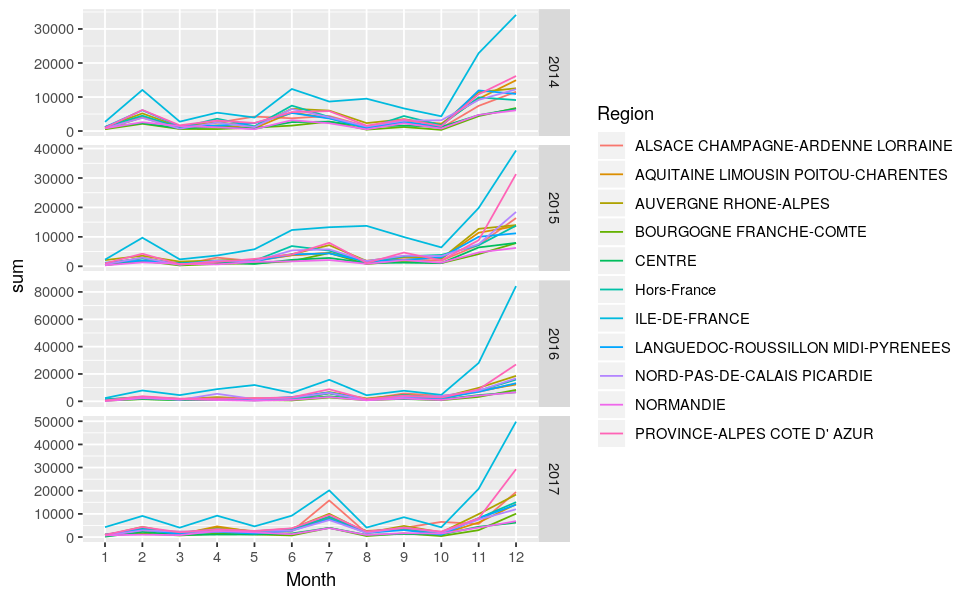

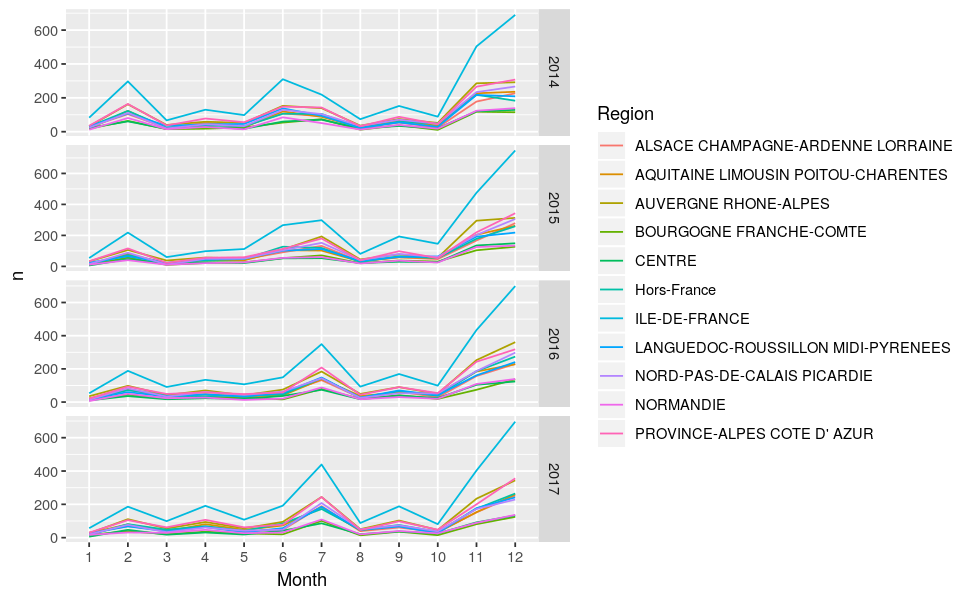

In [302]:
options(repr.plot.width=8, repr.plot.height=5)

data = recent_donors_acts %>% 
    filter(act_type_id == 'DO') %>%
    group_by(year, month, region.y) %>% 
    summarise(sum = sum(amount), n = n())

ggplot(data = data %>% filter(year < 2018 & year >= 2014), 
     aes(x = factor(month), y = sum))+
     geom_line(aes(color = region.y, group = region.y)) +
     facet_grid(factor(year) ~ ., scales='free') + 
     xlab('Month') + labs(color = 'Region')

ggplot(data = data %>% filter(year < 2018 & year >= 2014), 
     aes(x = factor(month), y = n))+
     geom_line(aes(color = region.y, group = region.y)) +
     facet_grid(factor(year) ~ ., scales='free') + 
     xlab('Month') + labs(color = 'Region')

options(repr.plot.width=8, repr.plot.height=3)

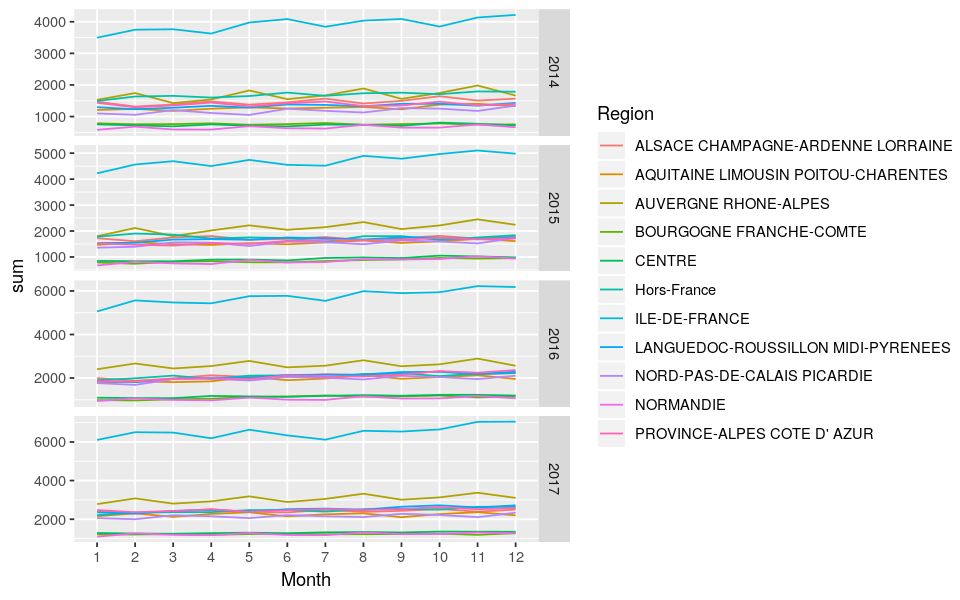

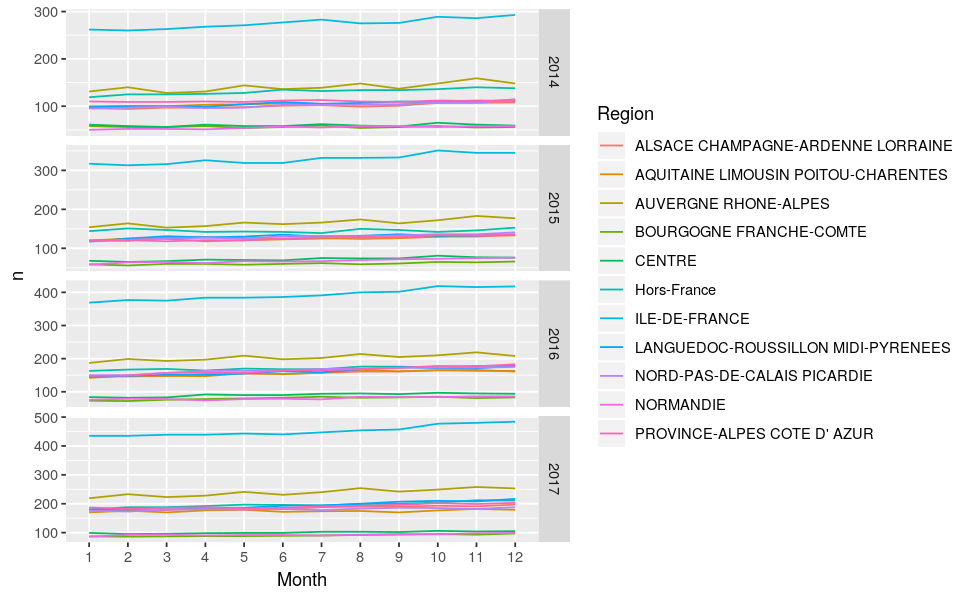

In [303]:
options(repr.plot.width=8, repr.plot.height=5)

data = recent_donors_acts %>% 
    filter(act_type_id == 'PA') %>%
    group_by(year, month, region.y) %>% 
    summarise(sum = sum(amount), n = n())

ggplot(data = data %>% filter(year < 2018 & year >= 2014), 
     aes(x = factor(month), y = sum))+
     geom_line(aes(color = region.y, group = region.y)) +
     facet_grid(factor(year) ~ ., scales='free') + 
     xlab('Month') + labs(color = 'Region')

ggplot(data = data %>% filter(year < 2018 & year >= 2014), 
     aes(x = factor(month), y = n))+
     geom_line(aes(color = region.y, group = region.y)) +
     facet_grid(factor(year) ~ ., scales='free') + 
     xlab('Month') + labs(color = 'Region')

options(repr.plot.width=8, repr.plot.height=3)

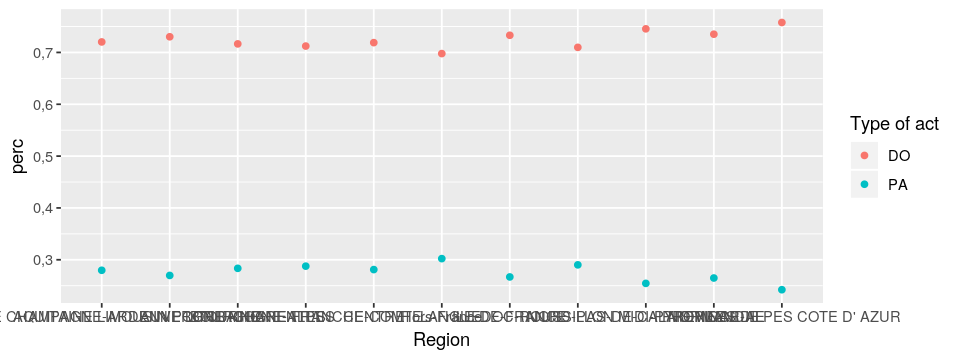

In [309]:
data = recent_donors_acts %>% 
    group_by(region.y, act_type_id) %>% 
    summarise(sum = sum(amount), n = n()) %>%
    group_by(region.y) %>%
    mutate(perc = sum/sum(sum))

ggplot(data = data, 
     aes(x = factor(region.y), y = perc))+
     geom_point(aes(color = act_type_id, group = region.y)) + 
     xlab('Region') + labs(color = 'Type of act')

# ACTIONS table : the charity's actions <a class="anchor" id="f3"></a>

In [269]:
str(actions)

'data.frame':	677177 obs. of  5 variables:
 $ id         : int  509 510 511 512 513 514 515 516 517 518 ...
 $ contact_id : int  160 160 160 160 160 160 160 160 160 160 ...
 $ campaign_id: chr  "C28" "C75" "C73" "C30" ...
 $ message_id : chr  "C28-18" "C75-18" "C73-10" "C30-4" ...
 $ action_date: chr  "2009-05-14" "2009-07-28" "2009-09-23" "2009-10-28" ...


In [360]:
triple_join = fetch(dbSendQuery(mydb, "SELECT a.campaign_id, a.action_date, 
d.contact_id, d.act_date, d.amount, d.act_type_id
FROM acts AS d
INNER JOIN contacts AS c ON c.id = d.contact_id
INNER JOIN actions AS a ON a.contact_id = d.contact_id
WHERE datediff(a.action_date, d.act_date) > -30 AND datediff(a.action_date, d.act_date) < -1"), n=-1)

Warning message in .local(conn, statement, ...):
“Unsigned INTEGER in col 2 imported as numeric”Warning message in .local(conn, statement, ...):
“Decimal MySQL column 4 imported as numeric”

In [361]:
str(triple_join)

'data.frame':	87157 obs. of  6 variables:
 $ campaign_id: chr  "C22" "C30" "C49" "C22" ...
 $ action_date: chr  "2008-05-25" "2009-10-28" "2011-11-18" "2008-05-25" ...
 $ contact_id : num  410 410 410 450 450 450 450 690 690 690 ...
 $ act_date   : chr  "2008-06-20" "2009-10-30" "2011-12-15" "2008-06-19" ...
 $ amount     : num  25 30 30 50 30 50 50 30 30 50 ...
 $ act_type_id: chr  "DO" "DO" "DO" "DO" ...


In [362]:
triple_join = triple_join %>% 
    filter(act_type_id == 'DO') %>%
    mutate(diff = as.numeric(difftime(act_date, action_date)))

triple_join$act_date = as.Date(triple_join$act_date)
triple_join$act_year = as.numeric(format(triple_join$act_date, format="%Y"))
triple_join$act_month = as.numeric(format(triple_join$act_date, format="%m"))
triple_join$action_date = as.Date(triple_join$action_date)
triple_join$action_year = as.numeric(format(triple_join$action_date, format="%Y"))
triple_join$action_month = as.numeric(format(triple_join$action_date, format="%m"))

head(triple_join)

campaign_id,action_date,contact_id,act_date,amount,act_type_id,diff,act_year,act_month,action_year,action_month
C22,2008-05-25,410,2008-06-20,25,DO,26,2008,6,2008,5
C30,2009-10-28,410,2009-10-30,30,DO,2,2009,10,2009,10
C49,2011-11-18,410,2011-12-15,30,DO,27,2011,12,2011,11
C22,2008-05-25,450,2008-06-19,50,DO,25,2008,6,2008,5
C24,2008-12-03,450,2008-12-26,30,DO,23,2008,12,2008,12
C49,2011-11-18,450,2011-12-13,50,DO,25,2011,12,2011,11


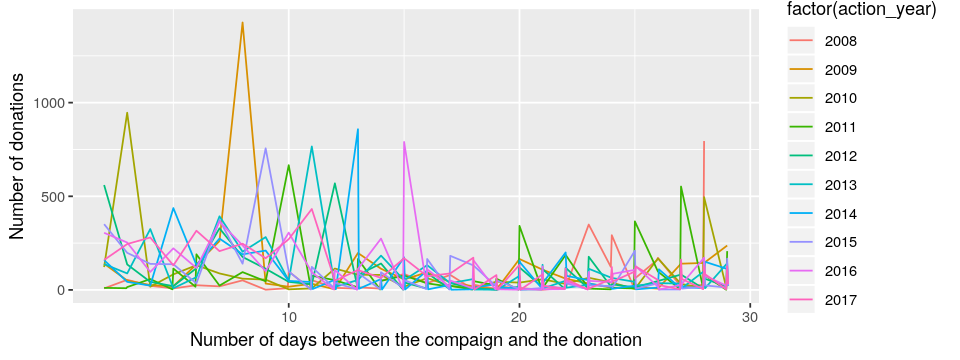

In [367]:
ggplot(data = triple_join %>%
       filter(action_year < 2018) %>%
       group_by(action_year, diff) %>%
        summarise(n = n()), 
      aes(x = diff, y = n)) +
geom_line(aes(color = factor(action_year), group = factor(action_year))) +
xlab('Number of days between the compaign and the donation') +
ylab('Number of donations')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


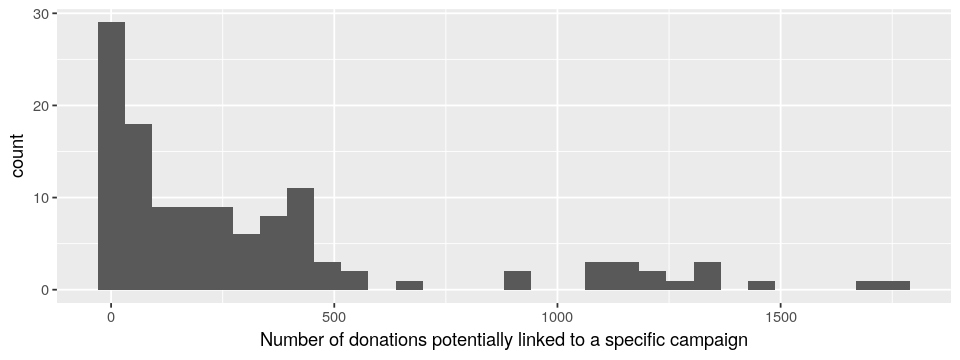

In [372]:
ggplot(data = triple_join %>%
       group_by(campaign_id) %>%
       count()) +
geom_histogram(aes(x = n)) + 
xlab('Number of donations potentially linked to a specific campaign')

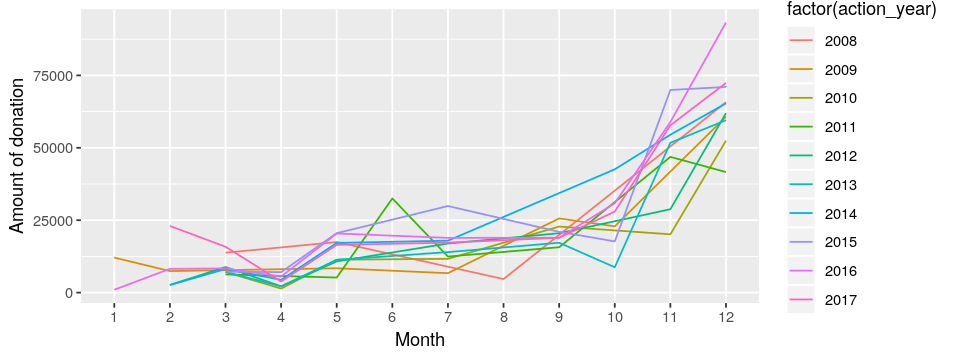

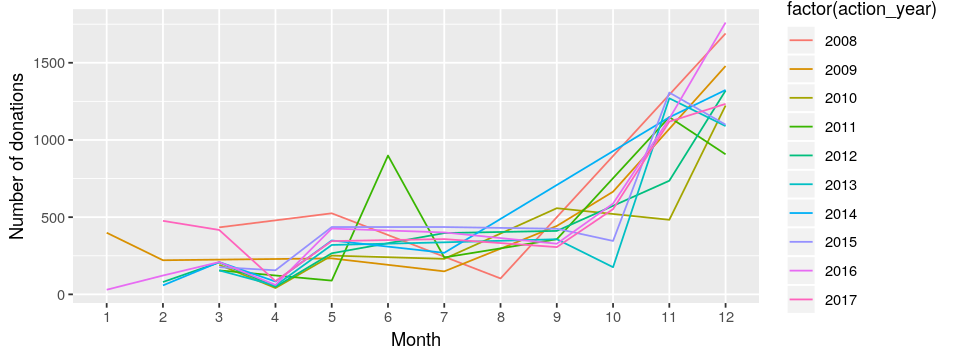

In [375]:
data = triple_join %>%
       filter(action_year < 2018) %>%
       group_by(action_year, action_month) %>%
        summarise(sum = sum(amount), n = n())

ggplot(data = data, 
      aes(x = factor(action_month), y = sum)) +
geom_line(aes(color = factor(action_year), group = factor(action_year))) +
xlab('Month') +
ylab('Amount of donation')

ggplot(data = data, 
      aes(x = factor(action_month), y = n)) +
geom_line(aes(color = factor(action_year), group = factor(action_year))) +
xlab('Month') +
ylab('Number of donations')

In [389]:
# Remove duplicates based on Sepal.Width columns
unique_id = recent_donors_acts[!duplicated(recent_donors_acts$id), ]


'data.frame':	20585 obs. of  22 variables:
 $ id               : num  160 410 440 450 690 750 900 1250 1420 1520 ...
 $ prefix_id        : Factor w/ 7 levels "AU","DR","MLLE",..: 4 4 4 4 3 4 4 4 4 4 ...
 $ first_name_clean : chr  "CLAUDINE" "CHANTAL" "YVETTE" "NICOLE" ...
 $ zip_code         : chr  "10300" "77290" "47450" "01370" ...
 $ town_clean       : chr  "SAINTE-SAVINE" "MITRY-MORY" "COLAYRAC-SAINT-CIRQ" "VAL-REVERMONT" ...
 $ code_geo         : chr  "10362" "77294" "47069" "01350" ...
 $ active           : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 1 ...
 $ region           : chr  "10" "77" "47" "01" ...
 $ id.y             : num  284 920 965 969 1372 ...
 $ amount           : num  20 25 30 50 30 15 30 30 40 50 ...
 $ act_date         : Date, format: "2008-03-02" "2008-06-20" ...
 $ act_type_id      : Factor w/ 2 levels "DO","PA": 1 1 1 1 1 1 1 1 1 1 ...
 $ payment_method_id: Factor w/ 6 levels "AU","CB","CH",..: 3 3 3 2 3 3 3 3 3 3 ...
 $ channel_id       : Factor w/ 2 level

In [393]:
test = left_join(triple_join, unique_id[, c('id', 'region.y')], by = c('contact_id' = 'id'))
str(test)

'data.frame':	40042 obs. of  12 variables:
 $ campaign_id : chr  "C22" "C30" "C49" "C22" ...
 $ action_date : Date, format: "2008-05-25" "2009-10-28" ...
 $ contact_id  : num  410 410 410 450 450 450 450 690 690 690 ...
 $ act_date    : Date, format: "2008-06-20" "2009-10-30" ...
 $ amount      : num  25 30 30 50 30 50 50 30 30 50 ...
 $ act_type_id : chr  "DO" "DO" "DO" "DO" ...
 $ diff        : num  26 2 27 25 23 25 11 28 21 22 ...
 $ act_year    : num  2008 2009 2011 2008 2008 ...
 $ act_month   : num  6 10 12 6 12 12 12 12 1 1 ...
 $ action_year : num  2008 2009 2011 2008 2008 ...
 $ action_month: num  5 10 11 5 12 11 12 12 12 12 ...
 $ region.y    : chr  "ILE-DE-FRANCE" "ILE-DE-FRANCE" "ILE-DE-FRANCE" "AUVERGNE RHONE-ALPES" ...


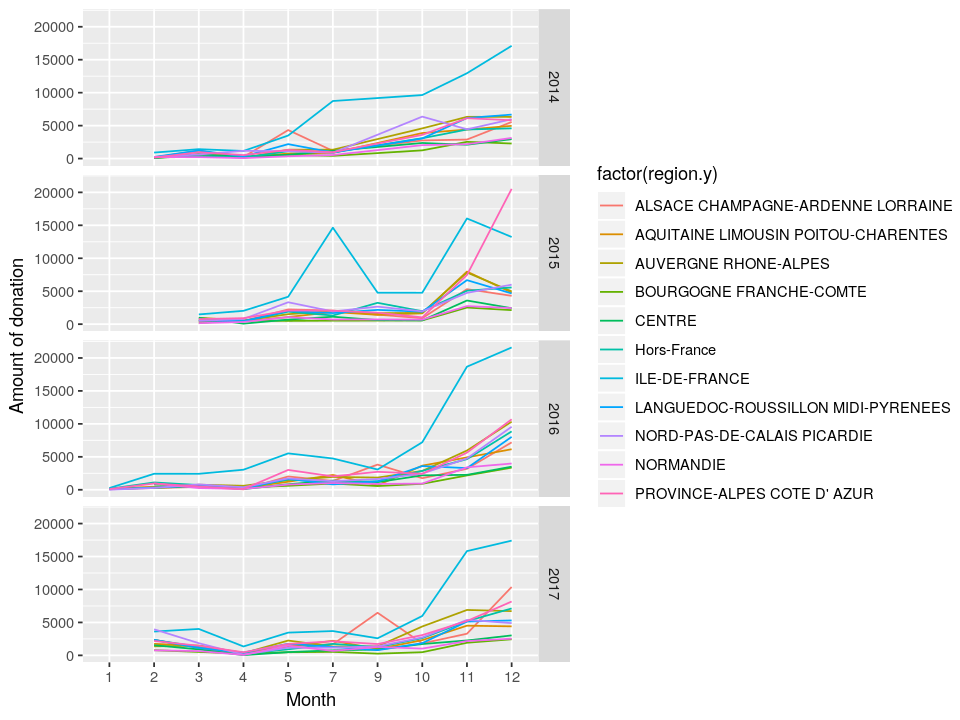

In [401]:
data = test %>%
       filter(action_year < 2018 & action_year >=2014) %>%
       group_by(action_year, action_month, region.y) %>%
        summarise(sum = sum(amount), n = n())

options(repr.plot.width=8, repr.plot.height=6)

ggplot(data = data, 
      aes(x = factor(action_month), y = sum)) +
geom_line(aes(color = factor(region.y), group = factor(region.y))) + 
facet_grid(factor(action_year) ~ .) +
xlab('Month') +
ylab('Amount of donation')